[ 0.501       0.6979596   0.89491919  1.09187879  1.28883838  1.48579798
  1.68275758  1.87971717  2.07667677  2.27363636  2.47059596  2.66755556
  2.86451515  3.06147475  3.25843434  3.45539394  3.65235354  3.84931313
  4.04627273  4.24323232  4.44019192  4.63715152  4.83411111  5.03107071
  5.2280303   5.4249899   5.62194949  5.81890909  6.01586869  6.21282828
  6.40978788  6.60674747  6.80370707  7.00066667  7.19762626  7.39458586
  7.59154545  7.78850505  7.98546465  8.18242424  8.37938384  8.57634343
  8.77330303  8.97026263  9.16722222  9.36418182  9.56114141  9.75810101
  9.95506061 10.1520202  10.3489798  10.54593939 10.74289899 10.93985859
 11.13681818 11.33377778 11.53073737 11.72769697 11.92465657 12.12161616
 12.31857576 12.51553535 12.71249495 12.90945455 13.10641414 13.30337374
 13.50033333 13.69729293 13.89425253 14.09121212 14.28817172 14.48513131
 14.68209091 14.87905051 15.0760101  15.2729697  15.46992929 15.66688889
 15.86384848 16.06080808 16.25776768 16.45472727 16

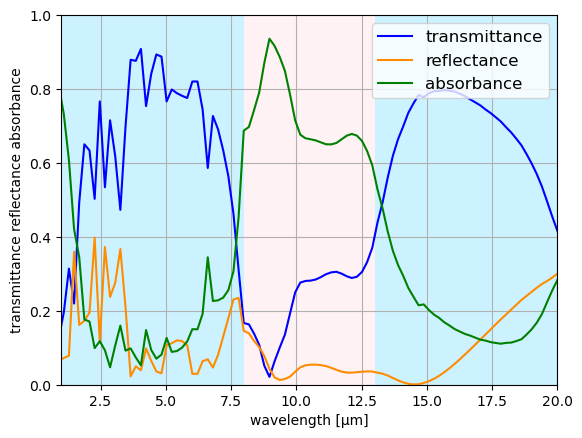

FOM:  -0.24361501712900907


In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from scipy import integrate
import os
import scipy.io as sio
from scipy.signal import fftconvolve
import json
import math
import S4
import sys

S=S4.New(Lattice=((6,0),(0,1)),NumBasis=80)
#S.SetOptions(PolarizationDecomposition = True)
pmma_string = 'PMMA'
sio2_string = 'SiO2'
sic_string  = 'SiC' 
#materialの設定
S.SetMaterial(Name='Vacuum',Epsilon=1)
S.SetMaterial(Name='Si',Epsilon=3.4**2)
S.SetMaterial(Name='SiO2',Epsilon=1.5**2)
S.SetMaterial(Name='SiC',Epsilon=3.0**2)
S.SetMaterial(Name='PMMA',Epsilon=1.48**2)
#レイヤーを設定今回は3つのレイヤー。
S.AddLayer(Name='Level0',Thickness=0.0, Material='Vacuum')

S.AddLayer(Name='Level1', Thickness=1, Material='Vacuum')

S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'SiO2',
        Center = (-2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'PMMA',
        Center = (-1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'PMMA',
        Center = (0,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'PMMA',
        Center = (1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'PMMA',
        Center = (2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level1',
        Material = 'PMMA',
        Center = (3,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)

S.AddLayer(Name='Level2', Thickness=1, Material='Vacuum')
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'SiC',
        Center = (-2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'PMMA',
        Center = (-1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'SiC',
        Center = (0,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'PMMA',
        Center = (1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'PMMA',
        Center = (2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level2',
        Material = 'PMMA',
        Center = (3,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.AddLayer(Name='Level3', Thickness=1, Material='Vacuum')
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'PMMA',
        Center = (-2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'PMMA',
        Center = (-1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'PMMA',
        Center = (0,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'SiC',
        Center = (1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'PMMA',
        Center = (2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level3',
        Material = 'SiC',
        Center = (3,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)



S.AddLayer(Name='Level4', Thickness=1, Material='Vacuum')
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'PMMA',
        Center = (-2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'SiC',
        Center = (-1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'PMMA',
        Center = (0,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'PMMA',
        Center = (1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'SiC',
        Center = (2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level4',
        Material = 'PMMA',
        Center = (3,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.AddLayer(Name='Level5', Thickness=1, Material='Vacuum')
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'SiO2',
        Center = (-2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'SiO2',
        Center = (-1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'SiO2',
        Center = (0,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'PMMA',
        Center = (1,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'SiO2',
        Center = (2,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)
S.SetRegionRectangle(
        Layer = 'Level5',
        Material = 'PMMA',
        Center = (3,0),
        Angle = 0,            
        Halfwidths = (0.5,0.5)
)


S.AddLayer(Name='Air',Thickness=0.0,Material='Vacuum')

#S.AddLayerCopy(Name = 'Air', Thickness = 0.0, Layer = 'Level0')

#波長範囲を設定
wavelength_array=np.linspace(0.501,20,100)
print(wavelength_array)
wavelength_array_inside = [8.18242424,  8.37938384,  8.57634343,
  8.77330303,  8.97026263,  9.16722222,  9.36418182,  9.56114141,  9.75810101,
  9.95506061, 10.1520202,  10.3489798,  10.54593939, 10.74289899, 10.93985859,
 11.13681818, 11.33377778, 11.53073737, 11.72769697, 11.92465657, 12.12161616,
 12.31857576, 12.51553535, 12.71249495, 12.90945455 ]
wavelength_array_outside1 = [ 1.09187879,  1.28883838,  1.48579798
  ,1.68275758,  1.87971717,  2.07667677,  2.27363636,  2.47059596,  2.66755556
  ,2.86451515,  3.06147475,  3.25843434,  3.45539394,  3.65235354,  3.84931313
  ,4.04627273,  4.24323232,  4.44019192,  4.63715152,  4.83411111,  5.03107071
  ,5.2280303 ,  5.4249899 ,  5.62194949,  5.81890909,  6.01586869,  6.21282828
  ,6.40978788,  6.60674747,  6.80370707,  7.00066667,  7.19762626,  7.39458586
  ,7.59154545,  7.78850505,  7.98546465]
wavelength_array_outside2 = [13.10641414, 13.30337374
 ,13.50033333, 13.69729293, 13.89425253, 14.09121212, 14.28817172, 14.48513131
 ,14.68209091, 14.87905051, 15.0760101 , 15.2729697 , 15.46992929, 15.66688889
 ,15.86384848, 16.06080808, 16.25776768, 16.45472727, 16.65168687, 16.84864646
 ,17.04560606, 17.24256566, 17.43952525, 17.63648485, 17.83344444, 18.03040404
 ,18.22736364, 18.42432323, 18.62128283, 18.81824242, 19.01520202, 19.21216162
 ,19.40912121, 19.60608081, 19.8030404 , 20.0       ]
Planck_array = np.array([0, 0, 0, 0, 0, 0, 
                         0, 0, 0.000288043, 0.00135375, 0.00480227, 0.01372, 
                         0.0330774, 0.0696502, 0.131452, 0.226819, 0.36338, 0.547144,
                         0.781861, 1.06871, 1.40629, 1.7909, 2.21696, 2.67747,
                         3.16459, 3.67005, 4.18564, 4.70348, 5.21628, 5.71753,
                         6.20159, 6.66371, 7.10005, 7.50765, 7.88431, 8.22861,
                         8.53973, 8.81744, 9.06197, 9.27395, 9.45431, 9.45431,
                         9.72518, 9.8186, 9.88614, 9.92948, 9.95031, 9.95034,
                         9.93122, 9.8946, 9.84205, 9.77508, 9.69512, 9.60354,
                         9.50163, 9.39058, 9.27153, 9.14551, 9.01351, 8.8764,
                         8.73501, 8.59011, 8.44238, 8.29244, 8.14088, 7.98821,
                         7.8349, 7.68137, 7.528, 7.37514, 7.22308, 7.07209, 
                         6.92241, 6.77425, 6.62779, 6.48319, 6.34058, 6.20009,
                         6.06181, 5.92583, 5.7922, 5.661, 5.53224, 5.40598,
                         5.28223, 5.16101, 5.04231, 4.92613, 4.81248, 4.70133,
                         4.59266, 4.48646, 4.3827, 4.28134, 4.18236, 4.08572,
                         3.99138, 3.89931, 3.80946, 3.7218])
Planck_normalized_array = Planck_array#/9.95282

#効率計算結果用アレイ
efficiency_array=[]
reflected_flux_array = []
emissive_array = []
reflected_flux_array_outside1 = []
reflected_flux_array_outside2 = []
reflected_flux_array_inside = []

SiC_array =[8.754 + 3.1151j,
8.233 + 1.4822j,
7.782 + 0.82933j,
7.491 + 0.42131j,
7.314 + 0.24926j,
7.176 + 0.13676j,
7.074 + 0.10054j,
6.9839 + 0.09500j,
6.9046 + 0.08200j,
6.8380 + 0.06637j,
6.7831 + 0.03826j,
6.7334 + 0.04249j,
6.6901 + 0.04932j,
6.6487 + 0.06847j,
6.6096 + 0.07007j,
6.5706 + 0.07252j,
6.5307 + 0.08640j,
6.4900 + 0.08079j,
6.4480 + 0.09803j,
6.4050 + 0.10675j,
6.3614 + 0.11642j,
6.3175 + 0.13313j,
6.2715 + 0.15966j,
6.2246 + 0.18603j,
6.1743 + 0.21988j,
6.1221 + 0.25605j,
6.0692 + 0.30192j,
6.0108 + 0.36845j,
5.9526 + 0.42544j,
5.8945 + 0.48197j,
5.8295 + 0.54284j,
5.7622 + 0.60196j,
5.6952 + 0.66032j,
5.6270 + 0.78800j,
5.5447 + 0.87648j,
5.4626 + 0.98680j,
5.3748 + 1.1011j,
5.2835 + 1.2337j,
5.1923 + 1.3818j,
5.0936 + 1.5397j,
4.9941 + 1.7230j,
4.8910 + 1.9222j,
4.7873 + 2.1428j,
4.6820 + 2.3902j,
4.5785 + 2.6454j,
4.4755 + 2.9267j,
4.3760 + 3.2247j,
4.2816 + 3.5554j,
4.1952 + 3.8942j,
4.1320 + 4.2408j,
4.0724 + 4.5963j,
4.0331 + 4.9568j,
4.0043 + 5.3048j,
4.0196 + 5.6106j,
4.0762 + 5.8913j,
4.1488 + 6.1786j,
4.2797 + 6.4138j,
4.4380 + 6.5982j,
4.6683 + 6.7117j,
4.9389 + 6.7864j,
5.2383 + 6.7901j,
5.5431 + 6.7467j,
5.9274 + 6.5442j,
6.3449 + 6.2162j,
6.7759 + 5.8601j,
7.209 + 5.2004j,
7.638 + 4.6370j,
8.051 + 4.2699j,
8.435 + 3.8830j,
8.770 + 3.5676j,
9.045 + 3.2499j,
9.320 + 3.0440j,
9.596 + 2.8393j,
9.871 + 2.6403j,
10.113 + 2.4561j,
10.298 + 2.2714j,
10.482 + 2.0996j,
10.606 + 1.9360j,
10.719 + 1.7777j,
10.817 + 1.6377j,
10.885 + 1.4977j,
10.953 + 1.3621j,
11.000 + 1.2393j,
11.036 + 1.1192j,
11.066 + 1.0132j,
11.083 + 0.9075j,
11.098 + 0.8098j,
11.110 + 0.7179j,
11.110 + 0.6269j,
11.109 + 0.5471j,
11.102 + 0.4674j,
11.094 + 0.3926j,
11.084 + 0.3247j,
11.071 + 0.2569j,
11.058 + 0.2569j,
11.041 + 0.2569j,
11.024 + 0.2569j,
11.006 + 0.2569j,
10.985 + 0.2569j,
10.964 + 0.2569j]

SiO2_array = [1.4809 + 0.0j,
1.4630 + 0.0j,
1.4557 + 0.0j,
1.4520 + 0.0j,
1.4498 + 0.0j,
1.4459 + 0.0j,
1.4459 + 0.0j,
1.4459 + 0.0j,
1.4459 + 0.0j,
1.4459 + 0.0j,
1.4459 + 0.0j,
1.3349 + 0.0j,
1.3232 + 0.0j,
1.3101 + 0.0j,
1.2957 + 0.0j,
1.2802 + 0.0j,
1.2633 + 0.0j,
1.2446 + 0.0j,
1.2246 + 0.0j,
1.2024 + 0.0j,
1.1782 + 0.0j,
1.1520 + 0.0j,
1.1233 + 0.0j,
1.0915 + 0.0j,
0.9078 + 0.0j,
0.8767 + 0.0j,
0.8425 + 0.0j,
0.8055 + 0.0j,
0.7641 + 0.0j,
0.7180 + 0.0j,
0.6642 + 0.0j,
0.6078 + 0.0j,
0.5400 + 0.0j,
0.4829 + 0.00032j,
0.3528 + 0.001507j,
0.1903 + 0.005836j,
-0.0213 + 0.021421j,
-0.3040 + 0.080120j,
-0.6364 + 0.24265j,
-0.9320 + 0.51375j,
-1.1630 + 0.76640j,
-1.5390 + 0.88468j,
-2.5130 + 0.99928j,
-5.0080 + 2.4938j,
-4.1110 + 8.5329j,
1.0271 + 9.5266j,
4.8515 + 8.3232j,
6.6935 + 4.9026j,
5.9383 + 2.3315j,
4.7909 + 1.3774j,
4.0859 + 1.0959j,
3.6834 + 0.94555j,
3.4010 + 0.81102j,
3.1528 + 0.68925j,
2.9058 + 0.59774j,
2.6527 + 0.56368j,
2.4083 + 0.60639j,
2.2138 + 0.73881j,
2.1138 + 0.93561j,
2.1353 + 1.1442j,
2.2726 + 1.3006j,
2.4789 + 1.3517j,
2.6903 + 1.2826j,
2.8460 + 1.1170j,
2.9167 + 0.70158j,
2.9013 + 0.58168j,
2.8188 + 0.39078j,
2.6955 + 0.24396j,
2.5528 + 0.20125j,
2.4092 + 0.18484j,
2.2733 + 0.14684j,
2.1505 + 0.12463j,
2.0386 + 0.10463j,
1.9386 + 0.18484j,
1.8464 + 0.18484j,
1.7623 + 0.19125j,
1.6837 + 0.20648j,
1.6094 + 0.20561j,
1.5388 + 0.21442j,
1.4710 + 0.21469j,
1.4053 + 0.22368j,
1.3415 + 0.23254j,
1.2786 + 0.24453j,
1.2161 + 0.25135j,
1.1537 + 0.25484j,
1.0903 + 0.26863j,
1.0254 + 0.27382j,
0.9581 + 0.28465j,
0.8870 + 0.29531j,
0.8109 + 0.31954j,
0.7283 + 0.33698j,
0.6374 + 0.36512j,
0.5354 + 0.39265j,
0.4190 + 0.44853j,
0.2845 + 0.49479j,
0.1266 + 0.54598j,
-0.0659 + 0.60568j,
-0.3132 + 0.68568j,
-0.6279 + 0.75691j,
-1.0340 + 0.85657j]

SiO2_array_index = 0
SiC_array_index = 0
Planck_normalized_array_index = 0
for wavelength in wavelength_array:
   
    S.SetMaterial(Name='SiO2',Epsilon=SiO2_array[SiO2_array_index])
    SiO2_array_index = SiO2_array_index + 1
    S.SetMaterial(Name='SiC',Epsilon=SiC_array[SiC_array_index])
    SiC_array_index = SiC_array_index + 1
    S.SetFrequency((1/wavelength))

    #入射角0度のs偏光平面波を入射する。
    S.SetExcitationPlanewave(IncidenceAngles=(0,0),sAmplitude=0,pAmplitude=1)
    
    #入射フラックスを取得
    (P_incident,P_reflect)=S.GetPowerFlux(Layer='Level0')
    
    #各次数の透過フラックスを取得
    #P_transmittance=S.GetPowerFluxByOrder(Layer='Air')
    (P_air_transmittance,P_air_reflect) =S.GetPowerFlux(Layer='Air')
    #1次回折光の効率になおす。
    #efficiency=(P_transmittance[1][0]/P_incident).real
    #Note that efficiency => transmittance
    efficiency=(P_air_transmittance/P_incident).real
    #efficiency=-(P_reflect/P_incident).real
    #アレイに追加。
    efficiency_array.append(efficiency)
    reflected_flux = (-(P_reflect/P_incident)).real
    reflected_flux_array.append(reflected_flux)
    #emissive = (1-((P_incident + P_reflect - P_air_transmittance)/P_incident)).real
    emissive = (1 - efficiency - reflected_flux )
    #emissive = ( efficiency)
    emissive_array.append(emissive)
    
    if(1<=wavelength<=8):
        reflected_flux_array_outside1.append((emissive)*Planck_normalized_array[Planck_normalized_array_index])
    if(8<wavelength<13):
        reflected_flux_array_inside.append((emissive)*Planck_normalized_array[Planck_normalized_array_index])
    if(13<=wavelength<=20):
        reflected_flux_array_outside2.append((emissive)*Planck_normalized_array[Planck_normalized_array_index])
        
    Planck_normalized_array_index = Planck_normalized_array_index +1
    


plt.grid()
plt.rcParams['font.size'] = 14
plt.xlabel('wavelength [μm]')
plt.ylabel('transmittance reflectance absorbance')
plt.plot(wavelength_array,efficiency_array, color = 'blue' , label = 'transmittance')
plt.plot(wavelength_array,reflected_flux_array, color = 'darkorange' , label = 'reflectance')
plt.plot(wavelength_array,emissive_array, color = 'green', label = 'absorbance')
# plt.axvline(8, color='k', linestyle='--')
# plt.axvline(13, color='k', linestyle='--')
plt.axvspan(xmin=0, xmax=8, facecolor="deepskyblue", alpha=0.2)
plt.axvspan(xmin=13, xmax=20, facecolor="deepskyblue", alpha=0.2)
plt.axvspan(xmin=8, xmax=13, facecolor="pink", alpha=0.2)
plt.xlim([1,20])
plt.ylim([0,1])
plt.legend(loc="upper right", prop={'size': 12} )
plt.show()
planck_1_8 = 20.5066#/9.95282
planck_8_13 = 47.1002#/9.95282
planck_13_20 = 40.2612#/9.95282


planck_all_window = integrate.simps(Planck_normalized_array, wavelength_array)
all_window = integrate.simps(emissive_array, wavelength_array)
insidewindows = integrate.simps(reflected_flux_array_inside, wavelength_array_inside)
outsidewindows1 = integrate.simps(reflected_flux_array_outside1, wavelength_array_outside1)
outsidewindows2 = integrate.simps(reflected_flux_array_outside2, wavelength_array_outside2)

print ("FOM: ",-((insidewindows/planck_8_13) - (outsidewindows1/planck_1_8) - (outsidewindows2/planck_13_20)))
    